# Effects of Loan Characteristics on Borrower APR

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the borrower Prosper Rating,Loan Original Amount,and Loan Term.

## Dataset Overview

The dataset containing 113,937 loans, each loan has 81 variables, such as Borrower APR, Lender Yield, Debt, etc.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [22]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

## The Distribution of Borrower APR

 The lowerest APR is at around 0.05% and the highestis at around 0.42%. Most loans are brorrowed at APR of 0.35797%

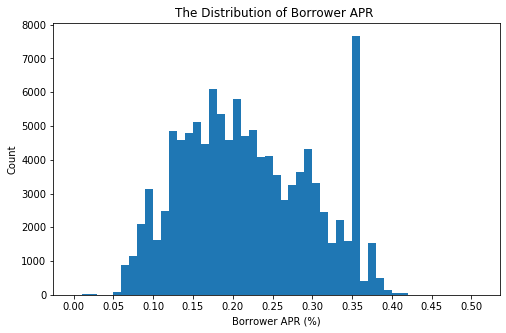

In [23]:
bins = np.arange(0, loans.BorrowerAPR.max(), 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);
plt.title('The Distribution of Borrower APR ')
plt.xlabel('Borrower APR (%)');
plt.ylabel('Count')
plt.xticks(np.arange(0, loans['BorrowerAPR'].max(), 0.05));

## The Distribution of Loan Term

Most of borrowers get loans at 36 months.

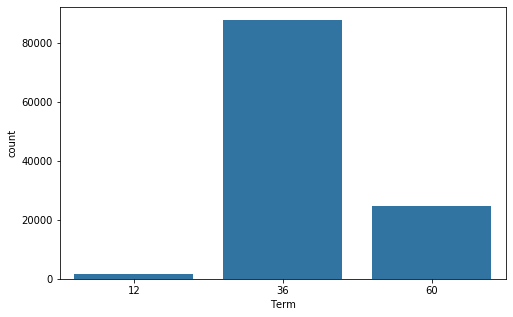

In [24]:
plt.figure(figsize=[8, 5])
base_color=sb.color_palette()[0]
sb.countplot(data = loans, x = 'Term',color= base_color);

## The Distribution of Loan Original Amount


Most borrowers get loans at 10k and 15k.

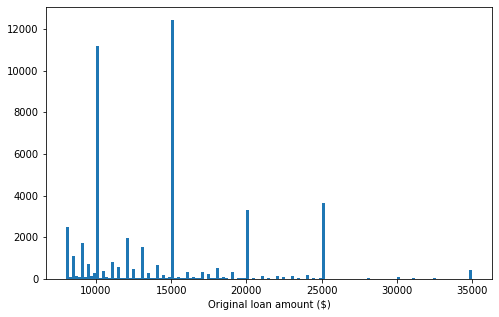

In [25]:
bins = np.arange(8000, loans.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

## The Distribution of Prosper Rating

Borrowers Rating are displayed in order from lowest to highestrating (HR , E , D , C , B , A , AA ). Most borrowers have rating of C.

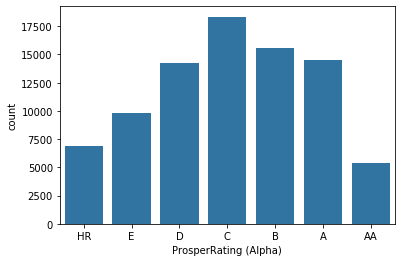

In [31]:
rate_order = ['HR','E','D','C','B','A','AA']
default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = default_color, order= rate_order);

## Borrower APR vs. Loan Amount

BorrowerAPR and LoanOriginalAmount have negative correlation, when APR decreases the loan amount increases.

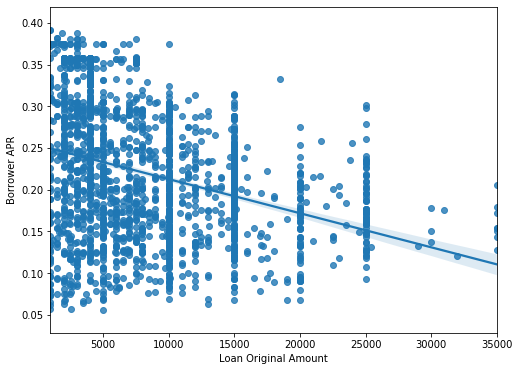

In [27]:
# scatter plot of borrower APR (numeric) vs. LoanOriginalAmount (numeric)
sample=np.random.choice(loans.shape[0],2000, replace=False)
loans_samp=loans.loc[sample]
plt.figure(figsize = [8, 6])
sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y= 'BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.show()

## The Influence of Prosper Rating on relationship between APR and Loan Amount


When borrowers have better rating the APR is lower (negative correlated). When borrower have better rating, they can borrow more loan amount(positive correlated) with lower APR.

/Users/SALMAN/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


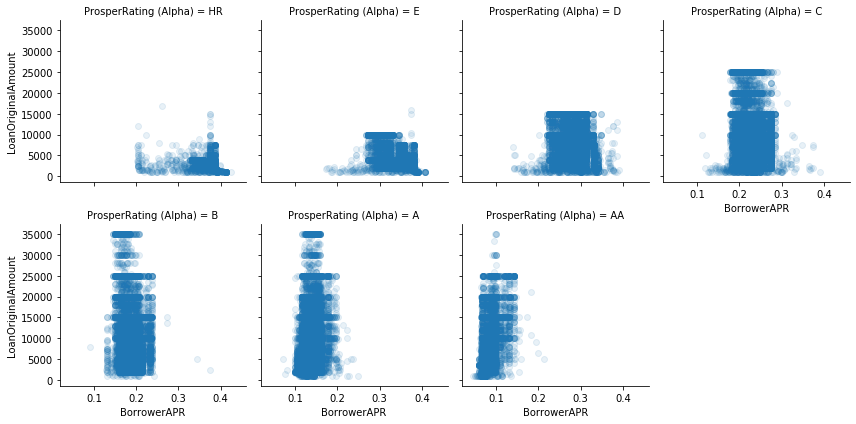

In [28]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('LoanOriginalAmount')

plt.show()

 ## Borrower APR across Prosper Rating  and Loan Term

From previous analysis we know when borrowers have higher rating get less APR. When Term increases the APR increases and that happens with AA, A and B rating. However, in C, D, AND E the APR increases when the term in less. HR rating only borrow at 36 months.

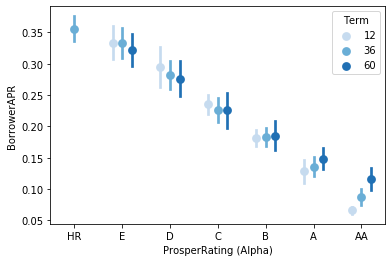

In [30]:
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')